In [8]:
#import streamlit as st 
import requests, json
import pandas as pd
import numpy as np
#import pydeck as pdk

# 실시간 위치 좌표 얻기
---
- 출처: https://parkgihyeon.github.io/project/geocoding-api/

In [2]:
# 현재위치 좌표 얻기
import requests, json

def current_location():
    here_req = requests.get("http://www.geoplugin.net/json.gp")

    if (here_req.status_code != 200):
        print("현재좌표를 불러올 수 없음")
    else:
        location = json.loads(here_req.text)
        crd = {"lat": str(location["geoplugin_latitude"]), "lng": str(location["geoplugin_longitude"])}

    return crd

crd = current_location()
print(crd)

{'lat': '35.8723', 'lng': '128.5924'}


In [3]:
# 가입 없이 좌표->주소 변환
from geopy.geocoders import Nominatim

def geocoding_reverse(lat_lng_str): 
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    address = geolocoder.reverse(lat_lng_str)

    return address

address = geocoding_reverse('35.8723, 128.5924')
print(address)

경상감영1길, 중구, 대구, 41934, 대한민국


In [9]:
# 가입 없이 주소->좌표 변환 ###
from geopy.geocoders import Nominatim

def geocoding(address):
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    geo = geolocoder.geocode(address)
    crd = {"lat": str(geo.latitude), "lng": str(geo.longitude)}

    return crd

crd = geocoding("대구 복현동")
print(crd['lat'])
print(crd['lng'])

35.8968175
128.6194541


# 장소 마크 표시 및 개수 세기
---- 
참고:https://haries.tistory.com/6

# streamlit yolov5 
---
참고 : https://github.com/xugaoxiang/yolov5-streamlit

# streamlit 드론 gps
---
참고: https://github.com/greattoe/ros_tutorial_kr/blob/master/ros1_tutorial/rospy/bebop2/bb2_5_mark_bebop2_on_web.md

# 도로 CCTV 송출
---
참고: https://parkgihyeon.github.io/project/cctv-api/#2%EF%B8%8F%E2%83%A3-cctv-api%EB%A5%BC-%ED%98%B8%EC%B6%9C%ED%95%98%EB%8A%94-%EB%B0%A9%EB%B2%95

# 수정코드
---

In [5]:
# 현재위치 좌표 얻기
import requests, json
import pandas as pd

def current_location():
    here_req = requests.get("http://www.geoplugin.net/json.gp")

    if (here_req.status_code != 200):
        print("현재좌표를 불러올 수 없음")
    else:
        location = json.loads(here_req.text)
        crd = {float(location["geoplugin_latitude"]), float(location["geoplugin_longitude"])}
        crd = list(crd)
        gps = pd.DataFrame( [[crd[1],crd[0]]], columns=['위도','경도'])
    
    return gps

In [6]:
gps = current_location()
gps

,위도,경도
0,35.8723,128.5924


In [40]:
data ={'위도':[35.8724,35.8725,35.8726,35.8727,35.8728],
        '경도': [128.5925,128.5926,128.5927,128.5928,128.5929]
}

a= pd.DataFrame(data ,columns=['위도','경도'] )
b = pd.concat([a,gps]).reset_index()
b = b.drop('index',axis=1)
b

,위도,경도
0,35.8724,128.5925
1,35.8725,128.5926
2,35.8726,128.5927
3,35.8727,128.5928
4,35.8728,128.5929
5,35.8723,128.5924


In [60]:
# gps_all(기존) 불러오기
gps_all = pd.read_csv('gps_all.csv')

# gps_all(기존), gps(추가 갱신) 데이터프레임 결합 
gps_all = pd.concat([b,gps]).reset_index()
gps_all = gps_all.drop('index',axis=1)

# 중복 위치 제거
gps_all = gps_all.drop_duplicates(['위도','경도'])
gps_all,len(gps_all,'개')

# 추가 위치정보 저장된 데이터프레임 저장
gps_all.to_csv('gps_all.csv',index = False)

(        위도        경도
 0  35.8724  128.5925
 1  35.8725  128.5926
 2  35.8726  128.5927
 3  35.8727  128.5928
 4  35.8728  128.5929
 5  35.8723  128.5924,
 6)

In [61]:
gps_all = pd.read_csv('gps_all.csv')
gps_all

,위도,경도
0,35.8724,128.5925
1,35.8725,128.5926
2,35.8726,128.5927
3,35.8727,128.5928
4,35.8728,128.5929
5,35.8723,128.5924
6,35.8723,128.5924


In [67]:
# 가입 없이 좌표->주소 변환
from geopy.geocoders import Nominatim

def geocoding_reverse(lat_lng_str): 
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    address = geolocoder.reverse(lat_lng_str)

    return address

address = geocoding_reverse('35.8723, 128.5924')
print(address)

TypeError: geocoding_reverse() takes 1 positional argument but 2 were given

In [82]:
#for i in range(7):
lat = gps_all['위도'][0]
lng = gps_all['경도'][0]
print(f'{lat},{lng}')

35.8724,128.5925


In [89]:
# 가입 없이 좌표->주소 변환
from geopy.geocoders import Nominatim

def geocoding_reverse(lat_lng_str): 
    geolocoder = Nominatim(user_agent = 'South Korea', timeout=None)
    address = geolocoder.reverse(lat_lng_str)

    return address

address_list = []
for i in range(len(gps_all)):
    lat = gps_all['위도'][i]
    lng = gps_all['경도'][i]
    address = geocoding_reverse(f'{lat}, {lng}')
    address_list.append(address)

In [92]:
df = pd.DataFrame(address_list, columns=['주소','위치정보(위도,경도)'])

df

,주소,위치정보
0,"경상감영1길, 중구, 대구, 41934, 대한민국","(35.87245514446016, 128.592945438279)"
1,"경상감영1길, 중구, 대구, 41934, 대한민국","(35.87254144204307, 128.592934754793)"
2,"경상감영1길, 중구, 대구, 41934, 대한민국","(35.87262773962598, 128.59292407130698)"
3,"경상감영1길, 중구, 대구, 41934, 대한민국","(35.87271400687035, 128.5929133926975)"
4,"경상감영1길, 중구, 대구, 41934, 대한민국","(35.87280033706745, 128.59290272873142)"
5,"경상감영1길, 중구, 대구, 41934, 대한민국","(35.87236884687725, 128.592956121765)"
6,"경상감영1길, 중구, 대구, 41934, 대한민국","(35.87236884687725, 128.592956121765)"


In [ ]:
LSMD_ADM_SECT_UMD_대구

In [17]:
!pip install geopandas

Defaulting to user installation because normal site-packages is not writeable
  Using cached geopandas-0.12.1-py3-none-any.whl (1.1 MB)
     ---------------------------------------- 1.3/1.3 MB 4.1 MB/s eta 0:00:00
     ---------------------------------------- 4.8/4.8 MB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 21.7/21.7 MB 1.8 MB/s eta 0:00:00
  Using cached munch-2.5.0-py2.py3-none-any.whl (10 kB)
  Using cached click_plugins-1.1.1-py2.py3-none-any.whl (7.5 kB)
  Using cached cligj-0.7.2-py3-none-any.whl (7.1 kB)


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


In [30]:
import geopandas as gpd
import pydeck as pdk

Daegu_file = "../LSMD_ADM_SECT_UMD_대구/LSMD_ADM_SECT_UMD_27.shp"
df = gpd.read_file(Daegu_file, encoding='euckr')
df.tail()

,EMD_CD,EMD_NM,SGG_OID,COL_ADM_SE,GID,geometry
199,27290105,호림동,708,27290,2449,"POLYGON ((1088106.230 1760762.433, 1088128.791..."
200,27290104,파호동,33,27290,2450,"POLYGON ((1088331.513 1760765.746, 1088331.321..."
201,27110149,태평로2가,582,27110,2575,"POLYGON ((1098824.688 1764977.063, 1098843.750..."
202,27110148,동성로1가,581,27110,2576,"POLYGON ((1098943.361 1764708.909, 1098942.878..."
203,27110147,대안동,580,27110,2577,"POLYGON ((1098659.271 1764647.397, 1098658.448..."


In [45]:
def multipolygon_to_coordinates(x):
    lon, lat = x[0].exterior.xy
    return [[x, y] for x, y in zip(lon, lat)]

In [47]:
df['coordinates'] = df['geometry'].apply(multipolygon_to_coordinates)
del df['geometry']

TypeError: 'Polygon' object is not subscriptable

In [32]:
# Make layer
layer = pdk.Layer(
    'PolygonLayer', # 사용할 Layer 타입
    df, # 시각화에 쓰일 데이터프레임
    get_polygon='coordinates', # geometry 정보를 담고있는 컬럼 이름
    get_fill_color='[0, 255*정규화인구, 0]', # 각 데이터 별 rgb 또는 rgba 값 (0~255)
    pickable=True, # 지도와 interactive 한 동작 on
    auto_highlight=True # 마우스 오버(hover) 시 박스 출력
)

# Set the viewport location
center = [126.986, 37.565]
view_state = pdk.ViewState(
    longitude=center[0],
    latitude=center[1],
    zoom=10)

# Render
r = pdk.Deck(layers=[layer], initial_view_state=view_state)
r.show()

DeckGLWidget(carto_key=None, custom_libraries=[], google_maps_key=None, json_input='{\n  "initialViewState": {…

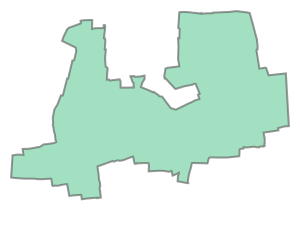

In [43]:
df['geometry'][2]